Формулировка задачи:  
Задача заключается в создании графа, где узлами являются сотрудники, а ребрами — отношения взаимодействия между ними (например, частота общения, уровень сотрудничества и т.д.). Оптимизация взаимодействия будет заключаться в нахождении наиболее эффективных маршрутов или узловых точек, способствующих повышению продуктивности работы команды.

Признаки для решения задачи:
1. Частота взаимодействия - сколько раз сотрудник взаимодействует с другими.
2. Уровень сотрудничества - оценка на основе совместных проектов или задач.
3. Удаленные/Офисные сотрудники - статус сотрудников; важно для понимания формата взаимодействия.
4. Эффективность общения - основанная на отзывах о совместной работе или результатах.
5. Позиция в организации - роль и уровень в иерархии, что может влиять на взаимодействие.

Набор данных:
- Список сотрудников с уникальными идентификаторами.
- Матрица взаимодействий, в которой строки и столбцы соответствуют сотрудникам, а значения показывают уровень взаимодействия (например, от 0 до 10).
- Дополнительные колонки с признаками: удаленный статус, позиция в компании и оценка сотрудничества.

Задача определить исполнителя для входящих задач на основе данных об их текущей нагрузке.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def make_complete(G):
    for node, degree in G.degree:
        if degree == 0:
            G.add_edge(node, np.random.randint(0, 101))
    return G

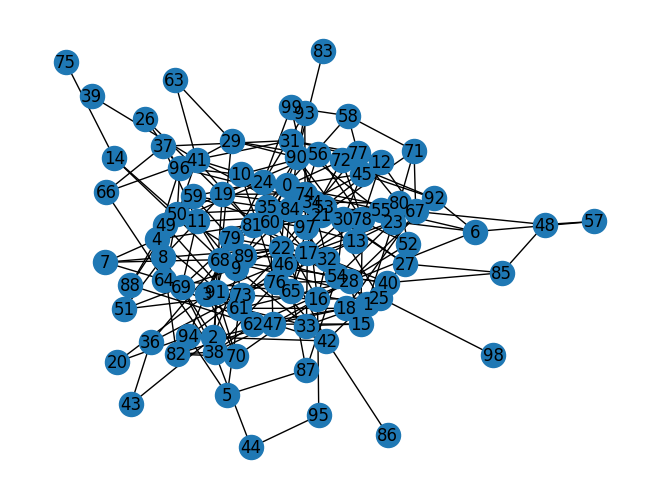

In [3]:
G = nx.dense_gnm_random_graph(n=100, m=250)
G = make_complete(G)
nx.draw(G, with_labels=True);

In [4]:
for u, v, data in G.edges(data=True):
    data['weight'] = np.random.randint(0, 101)

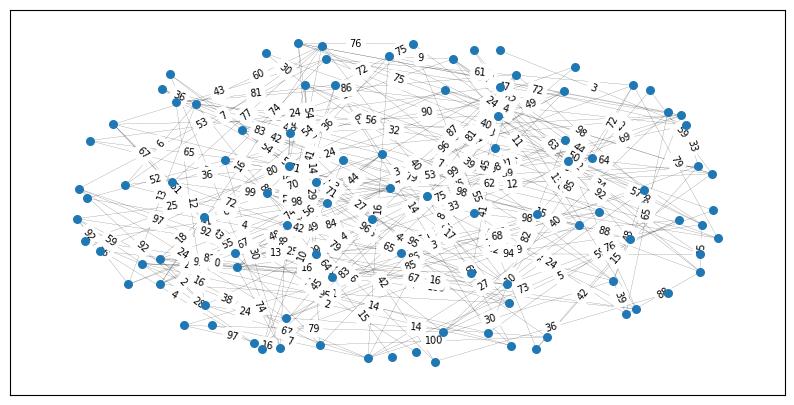

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
pos = nx.spring_layout(G, k=5, seed=42)
nx.draw_networkx_nodes(G, pos=pos, node_size=30, ax=ax)
nx.draw_networkx_edges(G, pos=pos, ax=ax, width=0.1)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=dict(nx.get_edge_attributes(G, 'weight')), font_size=7, ax=ax);

In [7]:
num_edges = len(G.edges)
importances = dict(G.degree())
for node, degree in importances.items():
    importances[node] = degree / num_edges

nx.set_node_attributes(G, importances, name='importances')

In [12]:
len(nx.algorithms.approximation.min_weighted_vertex_cover(G))

72

In [70]:
# Степенная центральность
degree_centrality = nx.degree_centrality(G)
print("Степенная центральность:", degree_centrality)

# Посредническая центральность
betweenness_centrality = nx.betweenness_centrality(G)
print("Посредническая центральность:", betweenness_centrality)

# Центральность близости
closeness_centrality = nx.closeness_centrality(G)
print("Центральность близости:", closeness_centrality)

# Коэффициент кластеризации
clustering_coefficient = nx.clustering(G)
print("Коэффициент кластеризации:", clustering_coefficient)

# Плотность графа
density = nx.density(G)
print("Плотность графа:", density)

# Диаметр графа
diameter = nx.diameter(G)
print("Диаметр графа:", diameter)

# Радиус графа
radius = nx.radius(G)
print("Радиус графа:", radius)

# Средняя длина пути
avg_path_length = nx.average_shortest_path_length(G)
print("Средняя длина пути:", avg_path_length)

# Центральность собственных векторов
eigenvector_centrality = nx.eigenvector_centrality(G)
print("Центральность собственных векторов:", eigenvector_centrality)

Степенная центральность: {0: 0.06060606060606061, 1: 0.020202020202020204, 2: 0.06060606060606061, 3: 0.06060606060606061, 4: 0.04040404040404041, 5: 0.05050505050505051, 6: 0.05050505050505051, 7: 0.05050505050505051, 8: 0.030303030303030304, 9: 0.05050505050505051, 10: 0.05050505050505051, 11: 0.020202020202020204, 12: 0.06060606060606061, 13: 0.04040404040404041, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.020202020202020204, 17: 0.09090909090909091, 18: 0.04040404040404041, 19: 0.04040404040404041, 20: 0.07070707070707072, 21: 0.08080808080808081, 22: 0.07070707070707072, 23: 0.030303030303030304, 24: 0.04040404040404041, 25: 0.05050505050505051, 26: 0.04040404040404041, 27: 0.020202020202020204, 28: 0.11111111111111112, 29: 0.020202020202020204, 30: 0.04040404040404041, 31: 0.07070707070707072, 32: 0.020202020202020204, 33: 0.05050505050505051, 34: 0.020202020202020204, 35: 0.05050505050505051, 36: 0.05050505050505051, 37: 0.08080808080808081, 38: 0.05050505050505051, 

In [73]:
# Compute the edge bottleneck coefficients
edge_bottlenecks = {}
for u, v, data in G.edges(data=True):
    # Compute the minimum cut using maximum flow
    edge_cut_value, edge_partition = nx.minimum_cut(G, u, v, capacity='weight')
    # Compute the bottleneck value for the edge
    edge_bottleneck = edge_cut_value / data['weight']
    edge_bottlenecks[(u, v)] = edge_bottleneck

print("Edge bottleneck coefficients:", edge_bottlenecks)

ZeroDivisionError: division by zero

c:\Users\Dima\AppData\Local\Programs\Python\Python310\lib\site-packages\networkx\drawing\nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


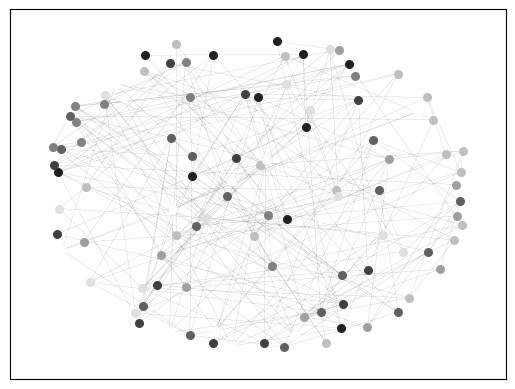

In [ ]:
partition = nx.algorithms.community.louvain_communities(G)

size = len(partition)
count = 0.
for com in partition:
    count = count + 1.
    nx.draw_networkx_nodes(G, pos, com, node_size=30, node_color=str(count / size), cmap='viridis')

nx.draw_networkx_edges(G, pos, width=0.1, alpha=0.5)
plt.show()